<hr>
Plot Sonde Locations on Map
<hr>

In [229]:
import numpy as np
import xarray as xr
import pandas as pd
import matplotlib.pyplot as mp

import cartopy
import cartopy.crs as ccrs
import cartopy.util as cutil
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter

#from mpl_toolkits.basemap import Basemap

<hr>
Set up Sonde locations
<hr>

In [230]:
## Plot Sonde Locations ##

slocs = ['Key West','Guantanamo','Guatemala City','Grand Cayman','Grand Bahamas',\
         'Trinidad','San Juan','Kingston','Swan Island','Bermuda','San Jose','Havana',\
         'Seawell']

In [231]:
slist = {}
slist['Key West']  = [24.55,-81.37]
slist['Guantanamo']  = [19.90,-75.15]
slist['Havana']  = [23.15,-82.35] 
slist['Guatemala City']  = [14.53,-90.57]
slist['Grand Cayman']  = [19.30,-81.37]
slist['Grand Bahamas']  = [26.62,-78.37]
slist['Trinidad']  = [10.68,-61.62]
slist['San Juan']  = [18.45,-66.12]
slist['Kingston']  = [17.93,-76.78]
slist['Swan Island']  = [17.40,-83.93] # Honduras
slist['Bermuda']  = [32.35,-64.70]
slist['San Jose']  = [9.98,-84.22] # Costa Rica
slist['Seawell']  = [13.07,-59.50] # Barbados

slist_df = pd.DataFrame.from_dict(slist, orient='index',columns=['lat','lon'])

<hr>
Plotting Locations
<hr>

-Key West 24.55 N -81.37 E
-Guantanamo 19.9 N -75.15 E
-Guatemala City 14.53 N -90.57 E
-Grand Cayman 19.3 N -81.37 E
-Grand Bahamas 26.62 N -78.37 E
-Trinidad 10.68 N -61.62 E
-San Juan 18.45 N -66.12 E
-Kingston 17.93 N -76.78 E
-Swan Island 17.4 N -83.93 E
-Bermuda 32.35 N -64.7 E
-San Jose 9.98 N -84.22 E
-Havana 23.15 N -82.35 E
-Seawell 13.07 N -59.5 E


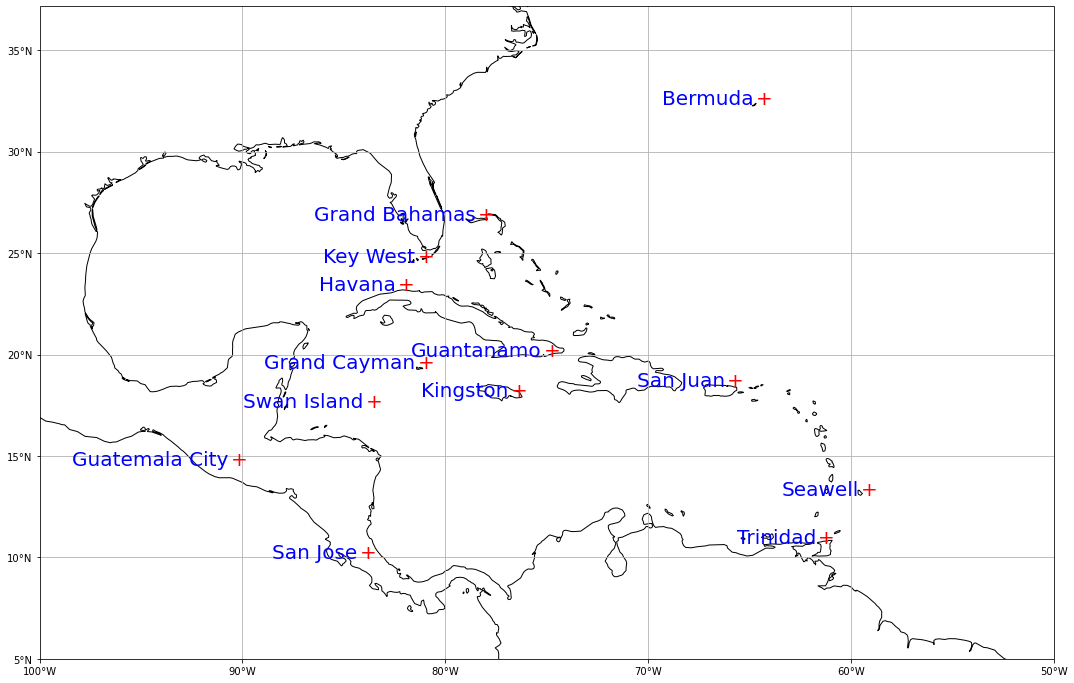

In [232]:
## Plot Map ##

extent = [260, 305, 5, 35]
mp.figure(figsize=(24, 12))
ax = mp.subplot(111, projection=ccrs.PlateCarree(central_longitude=180))
#ax = mp.axes(projection=ccrs.Orthographic(central_lon, central_lat))
ax.set_extent(extent)
ax.gridlines()
ax.coastlines(resolution='50m')

ax.set_xticks([260,270,280,290,300,310],  crs=ccrs.PlateCarree())
ax.set_yticks([5,10,15,20,25,30,35], crs=ccrs.PlateCarree())
lon_formatter = LongitudeFormatter(zero_direction_label=True)
lat_formatter = LatitudeFormatter()
ax.xaxis.set_major_formatter(lon_formatter)
ax.yaxis.set_major_formatter(lat_formatter)


#ax.stock_img()
#ax.add_image(ShadedReliefESRI(), 8) ## Adds real earth background


for splot in slocs:
    slat = slist_df.loc[splot]['lat'] ; slon = slist_df.loc[splot]['lon'] 
    print('-'+splot,slat,'N',slon,'E')
    mp.text(slon-0.1, slat, splot,transform=ccrs.Geodetic(),color='blue',horizontalalignment='right',size=20)
    mp.text(slon, slat, '+',transform=ccrs.Geodetic(),color='red',size=20)




In [233]:
from cartopy.io.img_tiles import GoogleTiles
class ShadedReliefESRI(GoogleTiles):
    # shaded relief
    def _image_url(self, tile):
        x, y, z = tile
        url = ('https://server.arcgisonline.com/ArcGIS/rest/services/' \
               'World_Shaded_Relief/MapServer/tile/{z}/{y}/{x}.jpg').format(
               z=z, y=y, x=x)
        return url